# Problem Statement: How can we increase revenue generated by our next marketing campaign with a focus on identifying key customer demographic to market? 

In [1]:
# imports!!!
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)


# We have 27 columns, 2240 rows
# income column has null values 2240 - 2216 about 1% -> Solution used delete rows with missing values = DONE!

# income is object -> change it - Done!
# dt customer is an object change to date yyyy-mm-dd - Done!

In [2]:
# Read
marketing_data = pd.read_csv(r'C:\Users\omi17\OneDrive - Springboard\Springboard Curriculum\Unit 16\Dataset\marketing_data.csv',index_col=0)

#Data Cleaning
# Drop missing values
marketing_data.dropna(inplace=True)

# Get rid of spaces in column names
marketing_data.columns=marketing_data.columns.str.strip() 

# Modify income column
marketing_data['Income']=marketing_data['Income'].str.replace('$','',regex=True)
marketing_data['Income']=marketing_data['Income'].str.replace(',','')
marketing_data.Income=marketing_data.Income.astype(float)

# Modify customer start date
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer']) 
marketing_data['Cust_Year']= pd.DatetimeIndex(marketing_data['Dt_Customer']).year
#marketing_data['Cust_Month']= pd.DatetimeIndex(marketing_data['Dt_Customer']).month_name()
#marketing_data['Cust_Day']= pd.DatetimeIndex(marketing_data['Dt_Customer']).day_name()

# Modify Marital Status
marketing_data.replace(to_replace=['YOLO','Alone','Absurd'],value='Single',inplace=True)

# Modify Education Status
marketing_data.replace(to_replace='Basic',value='High School',inplace=True)
marketing_data.replace(to_replace=['2n Cycle','Master'],value='Masters',inplace=True)
marketing_data.replace(to_replace='Graduation',value='Undergrad',inplace=True)

# Modify Country
marketing_data.replace(to_replace='SP',value='Spain',inplace=True)
marketing_data.replace(to_replace='CA',value='Canada',inplace=True)
marketing_data.replace(to_replace='US',value='USA',inplace=True)
marketing_data.replace(to_replace='AUS',value='Australia',inplace=True)
marketing_data.replace(to_replace='GER',value='Germany',inplace=True)
marketing_data.replace(to_replace='IND',value='India',inplace=True)
marketing_data.replace(to_replace='SA',value='South Africa',inplace=True)
marketing_data.replace(to_replace='ME',value= 'Mexico',inplace=True)

#Modify_dependents
marketing_data['Dependents']=marketing_data[['Kidhome','Teenhome']].sum(axis=1)

#Modify_Monthly_Spending
marketing_data['Monthly_Spending']=marketing_data[['MntWines','MntFruits',
                                                   'MntMeatProducts','MntFishProducts',
                                                   'MntSweetProducts','MntGoldProds']].sum(axis=1)

# Modify_Total_Campaigns

#Campaigns = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]
#marketing_data['TotalAcceptedCmp']=marketing_data[Campaigns].sum(axis=1)

#Modify_Accepted_Past_Campaign
marketing_data['Accepted_Past_Campaign']=marketing_data[["AcceptedCmp1","AcceptedCmp2",
                                                         "AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]].sum(axis=1)
marketing_data['Accepted_Past_Campaign'].replace(to_replace=[2,3,4,5],value=1,inplace=True)

#Drop Year_Birth before 1920 outliers
marketing_data.drop(marketing_data[marketing_data['Year_Birth'] < 1920].index, inplace=True)

#Modify year of birth to age
#ASSUMPTION TAKE LATEST ENROLLMENT DATE AS CURRENT DATE <<---|
marketing_data['Age']=marketing_data['Cust_Year'].max() - marketing_data['Year_Birth']




#Drop coulumns
marketing_data.drop(labels=['Kidhome','Teenhome','Dt_Customer','Year_Birth'],axis=1,inplace=True)
marketing_data.drop(labels=['MntWines','MntFruits','MntMeatProducts',
                            'MntFishProducts','MntSweetProducts','MntGoldProds'],axis=1,inplace=True)
marketing_data.drop(labels=["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3",
                            "AcceptedCmp4","AcceptedCmp5"],axis=1,inplace=True)





marketing_data.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country,Cust_Year,Dependents,Monthly_Spending,Accepted_Past_Campaign,Age
ID,,,,,,,,,,,,,,,,,
1826,Undergrad,Divorced,84835.0,0,1,4,4,6,1,1,0,Spain,2014,0,1190,0,44
1,Undergrad,Single,57091.0,0,1,7,3,7,5,1,0,Canada,2014,0,577,1,53
10476,Undergrad,Married,67267.0,0,1,3,2,5,2,0,0,USA,2014,1,251,0,56
1386,Undergrad,Together,32474.0,0,1,1,0,2,7,0,0,Australia,2014,2,11,0,47
5371,Undergrad,Single,21474.0,0,2,3,1,2,7,1,0,Spain,2014,1,91,1,25


In [3]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 1826 to 4070
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Education               2213 non-null   object 
 1   Marital_Status          2213 non-null   object 
 2   Income                  2213 non-null   float64
 3   Recency                 2213 non-null   int64  
 4   NumDealsPurchases       2213 non-null   int64  
 5   NumWebPurchases         2213 non-null   int64  
 6   NumCatalogPurchases     2213 non-null   int64  
 7   NumStorePurchases       2213 non-null   int64  
 8   NumWebVisitsMonth       2213 non-null   int64  
 9   Response                2213 non-null   int64  
 10  Complain                2213 non-null   int64  
 11  Country                 2213 non-null   object 
 12  Cust_Year               2213 non-null   int64  
 13  Dependents              2213 non-null   int64  
 14  Monthly_Spending        2213 non-null

In [4]:
marketing_data.describe()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Cust_Year,Dependents,Monthly_Spending,Accepted_Past_Campaign,Age
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,52236.581563,49.007682,2.325350,4.087664,2.671487,5.805242,5.321735,0.150474,0.009038,2013.028016,0.947582,607.021690,0.206959,45.082693
std,25178.603047,28.941864,1.924402,2.741664,2.927096,3.250752,2.425092,0.357617,0.094657,0.685771,0.749297,602.488663,0.405217,11.700216
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,0.000000,5.000000,0.000000,18.000000
25%,35246.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,2013.000000,0.000000,69.000000,0.000000,37.000000
50%,51373.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,2013.000000,1.000000,397.000000,0.000000,44.000000
75%,68487.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,2013.000000,1.000000,1048.000000,0.000000,55.000000
max,666666.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,2014.000000,3.000000,2525.000000,1.000000,74.000000


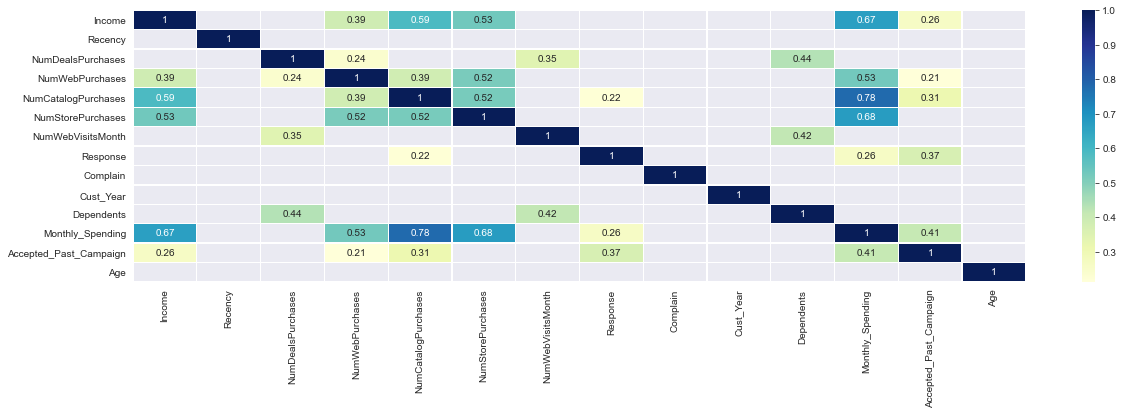

In [5]:
corr= marketing_data.corr()
test= corr[corr>=.2]
sns.heatmap(test,linewidths=0.3,cmap="YlGnBu",annot=True)
sns.set(rc={'figure.figsize':(10,10)});
# correlation > 0.5
#,annot=True

# Response doesn't show significant correlation with any variable
# Accepted past campaign = 0.37, Monthly_Spending 0.26, NumCatalogPurchases=0.22


# EDA (Insights)

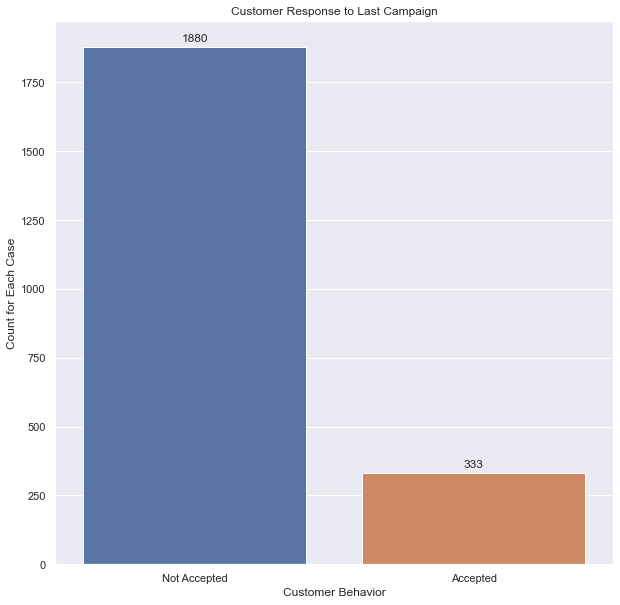

In [6]:
ax=sns.countplot(x='Response',data=marketing_data,palette='deep')
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel('Customer Behavior')
plt.ylabel('Count for Each Case')
plt.xticks([0,1],['Not Accepted','Accepted'])
plt.title('Customer Response to Last Campaign')

 # label count plot
for p in ax.patches:
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label
 y = height+20, # y-coordinate position of data label
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center



In [7]:
count_not_accepted = len(marketing_data[marketing_data['Response']==0])
count_accepted = len(marketing_data[marketing_data['Response']==1])
pct_of_not_accepted = count_not_accepted/(count_not_accepted+count_accepted)
print("Percentage of Customers that did not accept campaign is", round(pct_of_not_accepted*100,2),'%')
pct_of_accepted = count_accepted/(count_not_accepted+count_accepted)
print("Percentage of Customers that accepted campaign is", round(pct_of_accepted*100,2),'%')

Percentage of Customers that did not accept campaign is 84.95 %
Percentage of Customers that accepted campaign is 15.05 %


In [8]:
# Last Marketing campaign had an acceptance rate of 15%

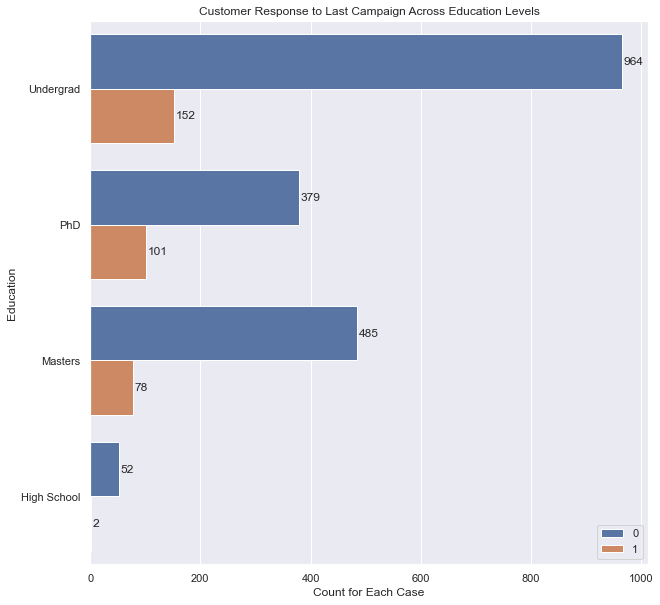

In [9]:
ax=sns.countplot(y='Education',hue='Response',data=marketing_data,
            palette='deep')
sns.set(rc={'figure.figsize':(10,10)})
plt.ylabel('Education')
plt.xlabel('Count for Each Case')

plt.legend(loc='lower right')
plt.title('Customer Response to Last Campaign Across Education Levels')


# label each bar in barplot
for p in ax.patches:
 height = p.get_height() 
 width = p.get_width() 
 # adding text to each bar
 ax.text(x = width+3, # x-coordinate position of data label
 y = p.get_y()+(height/2), # y-coordinate position of data label
 s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
 va = 'center') # sets vertical alignment (va) to center

In [10]:
# Acceptance Rates: Undergrad=13.6%, PhD=21%, , Masters=13.8%, High School= 3.7%

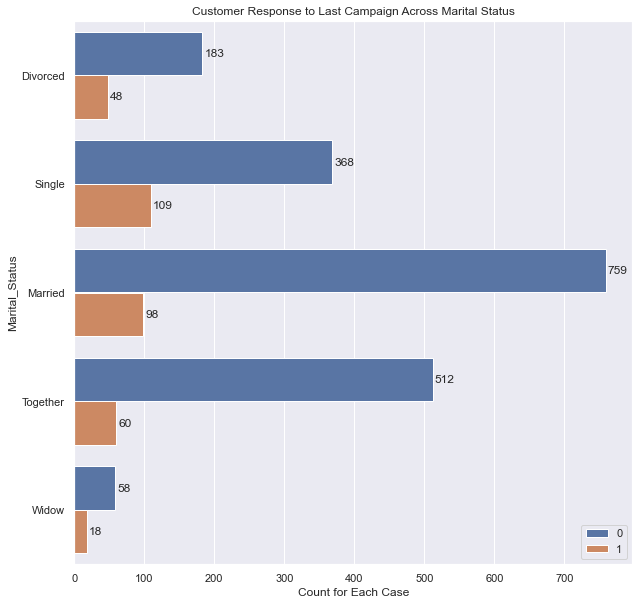

In [11]:
ax=sns.countplot(y='Marital_Status',hue='Response',data=marketing_data,
            palette='deep')
sns.set(rc={'figure.figsize':(10,10)})
plt.ylabel('Marital_Status')
plt.xlabel('Count for Each Case')
plt.legend(loc='lower right')
plt.title('Customer Response to Last Campaign Across Marital Status')

# label each bar in barplot
for p in ax.patches:
 height = p.get_height() 
 width = p.get_width() 
 # adding text to each bar
 ax.text(x = width+3, # x-coordinate position of data label
 y = p.get_y()+(height/2), # y-coordinate position of data label
 s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
 va = 'center') # sets vertical alignment (va) to center

In [12]:
# Divorced=20.8%, Single=22.8%, Married= 11.4%, Together=10.5%, Widoow=23.7%

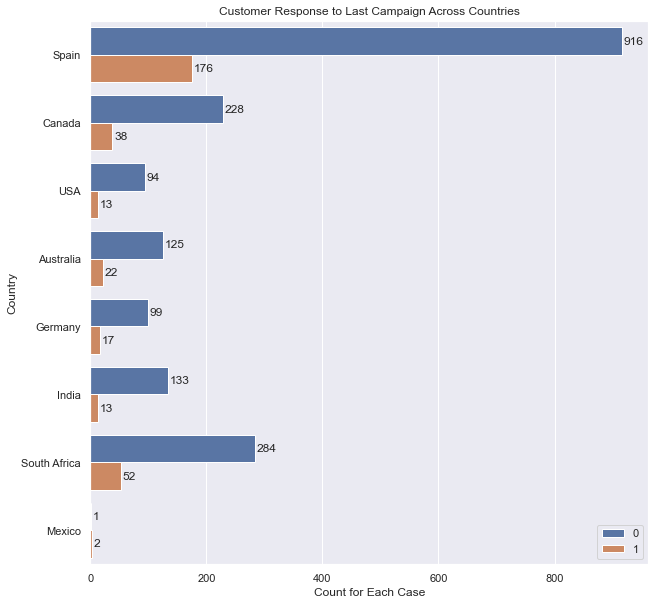

In [13]:
ax=sns.countplot(y='Country',hue='Response',data=marketing_data,
            palette='deep')
sns.set(rc={'figure.figsize':(10,10)})
plt.ylabel('Country')
plt.xlabel('Count for Each Case')
plt.legend(loc='lower right')
plt.title('Customer Response to Last Campaign Across Countries')

# label each bar in barplot
for p in ax.patches:
 height = p.get_height() 
 width = p.get_width() 
 # adding text to each bar
 ax.text(x = width+3, # x-coordinate position of data label
 y = p.get_y()+(height/2), # y-coordinate position of data label
 s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
 va = 'center') # sets vertical alignment (va) to center

In [14]:
#Spain=16.11%, Canada=14.3%, USA=12.1%, Australia=14.9%, Germany=14.6%, India=8.9%, SA=15.5%, ME=66.7%

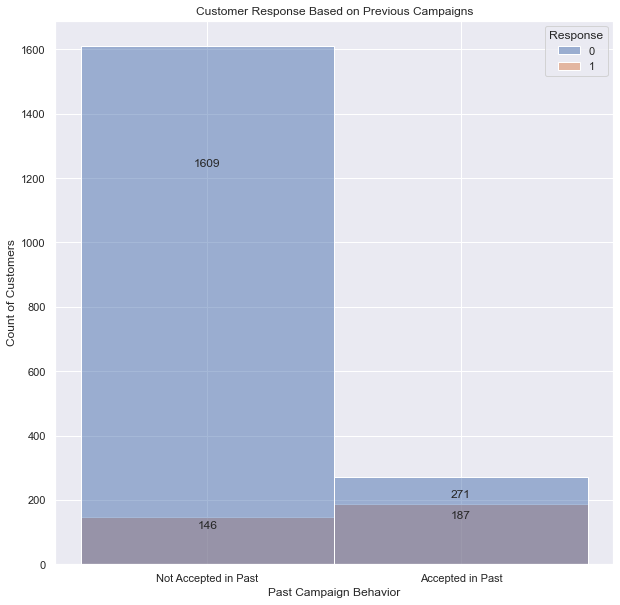

In [15]:
ax=sns.histplot(data=marketing_data, x='Accepted_Past_Campaign'
             ,bins=2,hue='Response',palette='deep')
plt.xlabel('Past Campaign Behavior')
plt.ylabel('Count of Customers')

plt.xticks([0.25,0.75],['Not Accepted in Past', 'Accepted in Past'])
plt.title('Customer Response Based on Previous Campaigns')

# label count plot
for p in ax.patches:
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label
 y = height/1.3, # y-coordinate position of data label
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

In [16]:
# Not Accepted in Past is 8.3%, Accepted in past 40.8% 

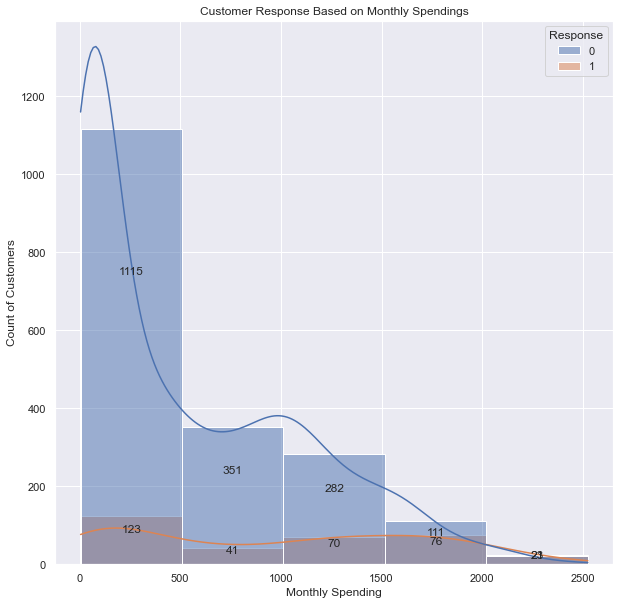

In [17]:
ax=sns.histplot(data=marketing_data, x='Monthly_Spending',bins=5,hue='Response',kde=True,palette='deep')
plt.xlabel('Monthly Spending')
plt.ylabel('Count of Customers')


plt.title('Customer Response Based on Monthly Spendings')

# label count plot
for p in ax.patches:
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label
 y = height/1.5, # y-coordinate position of data label
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

In [18]:
# 0-500 = 9.9%, 500-1000 = 10.5%, 1000-1500 = 19.8%, 1500-2000 = 40.6%, 2000-2500 = 85.2%

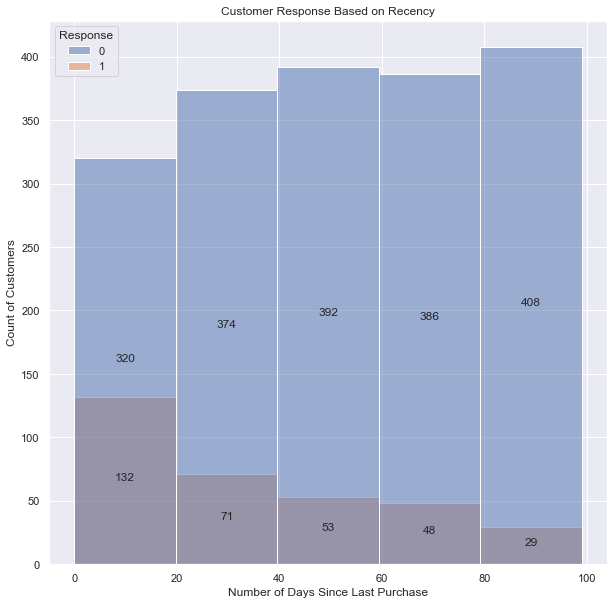

In [59]:
ax=sns.histplot(data=marketing_data, x='Recency',bins=5,hue='Response',palette='deep')
plt.xlabel('Number of Days Since Last Purchase')
plt.ylabel('Count of Customers')


plt.title('Customer Response Based on Recency')

# label count plot
for p in ax.patches:
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label
 y = height/2, # y-coordinate position of data label
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

In [20]:
# 0-20: 29.2%, 20-40= 15.9%, 40-60 = 11.9%, 60-80= 11%,  

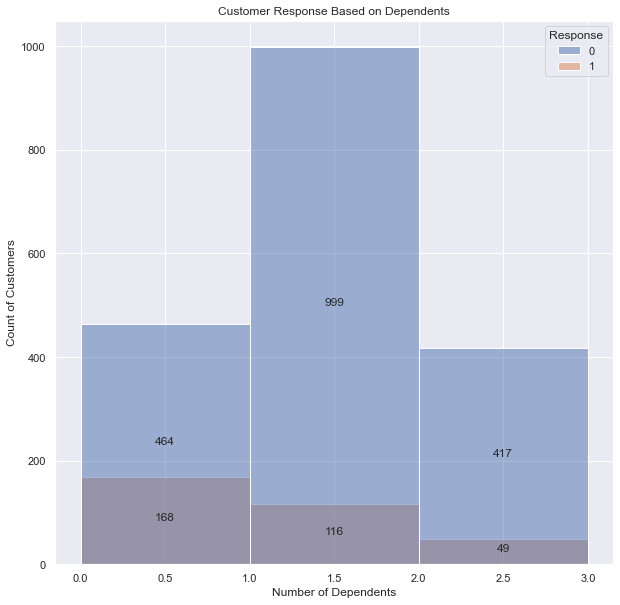

In [21]:
ax=sns.histplot(data=marketing_data, x='Dependents',bins=3,hue='Response',palette='deep')
plt.xlabel('Number of Dependents')
plt.ylabel('Count of Customers')


plt.title('Customer Response Based on Dependents')

# label count plot
for p in ax.patches:
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label
 y = height/2, # y-coordinate position of data label
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

In [22]:
# 0-1=26.1%, 1-2=10.4%, 10.5%

In [23]:
marketing_data.groupby('Response').mean()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Cust_Year,Dependents,Monthly_Spending,Accepted_Past_Campaign,Age
Response,,,,,,,,,,,,,
0,50824.326064,51.442021,2.322872,3.913298,2.400532,5.756383,5.324468,0.009043,2013.077660,1.000532,539.954255,0.144149,45.185106
1,60209.675676,35.264264,2.339339,5.072072,4.201201,6.081081,5.306306,0.009009,2012.747748,0.648649,985.660661,0.561562,44.504505


In [24]:
marketing_data.groupby('Response').median()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Cust_Year,Dependents,Monthly_Spending,Accepted_Past_Campaign,Age
Response,,,,,,,,,,,,,
0,50150.0,52,2,3,1,5,6,0,2013,1,315,0,44
1,64090.0,30,1,5,4,6,6,0,2013,0,1053,1,43


# Customers with higher income, #ofwebpurchases, #ofcatalogpurchases, monthly spending and acceptance of campaign in past are more likely to accept campaign

# Customers with lower recency and dependents are more likely to accept campaign as well

# Prediction Modeling

In [25]:
marketing_data.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country,Cust_Year,Dependents,Monthly_Spending,Accepted_Past_Campaign,Age
ID,,,,,,,,,,,,,,,,,
1826,Undergrad,Divorced,84835.0,0,1,4,4,6,1,1,0,Spain,2014,0,1190,0,44
1,Undergrad,Single,57091.0,0,1,7,3,7,5,1,0,Canada,2014,0,577,1,53
10476,Undergrad,Married,67267.0,0,1,3,2,5,2,0,0,USA,2014,1,251,0,56
1386,Undergrad,Together,32474.0,0,1,1,0,2,7,0,0,Australia,2014,2,11,0,47
5371,Undergrad,Single,21474.0,0,2,3,1,2,7,1,0,Spain,2014,1,91,1,25


In [26]:
marketing_data.to_csv('Capstone2')

In [27]:
md_copy=marketing_data.copy()
md_copy=pd.get_dummies(md_copy,columns=['Education','Marital_Status','Country'])
display(md_copy)

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Cust_Year,...,Marital_Status_Together,Marital_Status_Widow,Country_Australia,Country_Canada,Country_Germany,Country_India,Country_Mexico,Country_South Africa,Country_Spain,Country_USA
ID,,,,,,,,,,,,,,,,,,,,,
1826,84835.0,0,1,4,4,6,1,1,0,2014,...,0,0,0,0,0,0,0,0,1,0
1,57091.0,0,1,7,3,7,5,1,0,2014,...,0,0,0,1,0,0,0,0,0,0
10476,67267.0,0,1,3,2,5,2,0,0,2014,...,0,0,0,0,0,0,0,0,0,1
1386,32474.0,0,1,1,0,2,7,0,0,2014,...,1,0,1,0,0,0,0,0,0,0
5371,21474.0,0,2,3,1,2,7,1,0,2014,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,66476.0,99,2,5,2,11,4,0,0,2013,...,0,0,0,0,0,0,0,0,0,1
5263,31056.0,99,1,1,0,3,8,0,0,2013,...,0,0,0,0,0,0,0,0,1,0
22,46310.0,99,2,6,1,5,8,0,0,2012,...,0,0,0,0,0,0,0,0,1,0


In [28]:
from sklearn.model_selection import train_test_split

y_variable=md_copy.Response
x_variables=md_copy.drop('Response',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x_variables, y_variable, test_size=0.15)
x_train.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Cust_Year,Dependents,...,Marital_Status_Together,Marital_Status_Widow,Country_Australia,Country_Canada,Country_Germany,Country_India,Country_Mexico,Country_South Africa,Country_Spain,Country_USA
ID,,,,,,,,,,,,,,,,,,,,,
4023,22979.0,29,3,3,2,2,8,0,2012,1,...,0,0,0,0,0,0,0,0,1,0
9216,35788.0,34,2,2,0,3,6,0,2014,2,...,0,0,0,1,0,0,0,0,0,0
8029,90247.0,27,1,3,4,7,1,0,2014,0,...,0,0,0,0,0,0,0,0,0,1
6303,91820.0,72,0,5,5,12,1,0,2013,0,...,1,0,0,1,0,0,0,0,0,0
5734,61917.0,83,1,2,0,4,5,0,2013,2,...,0,0,0,0,0,0,0,0,1,0


In [29]:
logit_model=sm.Logit(y_train,x_train).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.278513
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1881
Model:                          Logit   Df Residuals:                     1853
Method:                           MLE   Df Model:                           27
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.3438
Time:                        10:30:17   Log-Likelihood:                -523.88
converged:                       True   LL-Null:                       -798.32
Covariance Type:            nonrobust   LLR p-value:                 1.207e-98
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Income                  -4.454e-07   5.12e-06     -0.087      0.931   -1.05e-05  

# Recency, NumStorePurchases, NumWebVisitsMonth, Cust_Year, Dependents, Monthly_Spending , Accepted_Past_Campaign

In [30]:
y_predict = logit_model.predict(x_train)
prediction_lr = list(map(round, y_predict))

# print('Acutal values', list(y_train.values))
# print('Predictions :', prediction_lr)

In [31]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
  
cm_lr = confusion_matrix(y_train, prediction_lr) 
print ("Logistic Regression Confusion Matrix : \n", cm_lr) 
  
print('Logistic Regression Accuracy = %.3f' % accuracy_score(y_train, prediction_lr))

Logistic Regression Confusion Matrix : 
 [[1547   50]
 [ 161  123]]
Logistic Regression Accuracy = 0.888


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
prediction_rf = rf.predict(x_train)

cm_rf = confusion_matrix(y_train, prediction_rf) 
print ("Random Forest confusion Matrix : \n", cm_rf)

print('Random Forest accuracy = %.3f' % accuracy_score(y_train, prediction_rf))

Random Forest confusion Matrix : 
 [[1596    1]
 [   5  279]]
Random Forest accuracy = 0.997


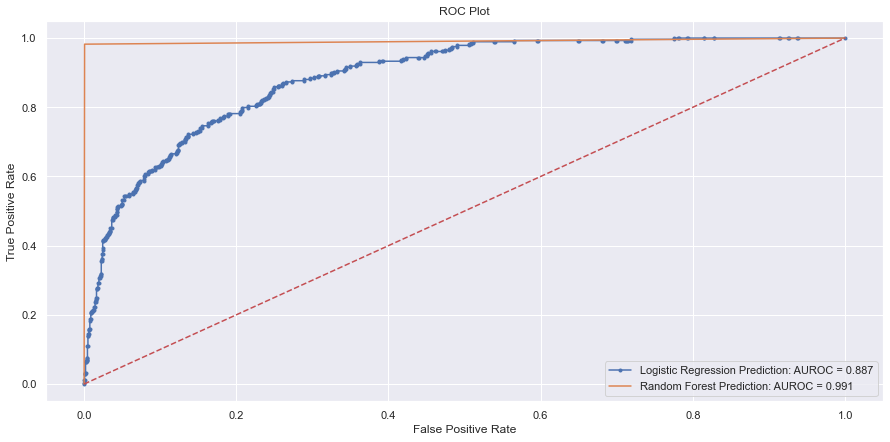

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lr_roc_auc = roc_auc_score(y_train, y_predict)
rf_roc_auc = roc_auc_score(y_train, prediction_rf)

lr_fpr, lr_tpr, _ = roc_curve(y_train, y_predict)
plt.figure(figsize=[15,7])
plt.plot(lr_fpr, lr_tpr, marker='.',  
         label='Logistic Regression Prediction: AUROC = %.3f' % lr_roc_auc)
rf_fpr, rf_tpr, _ = roc_curve(y_train, prediction_rf)
# plt.figure(figsize=[15,7])
plt.plot(rf_fpr, rf_tpr,  
          label='Random Forest Prediction: AUROC = %.3f' % rf_roc_auc)

plt.plot([0,1],[0,1],'r--')


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
plt.legend(loc='lower right')
# Show plot
plt.show()

In [34]:
test_prediction_lr = logit_model.predict(x_test)
test_prediction_lr_ = list(map(round,test_prediction_lr))

cm_lr_test = confusion_matrix(y_test, test_prediction_lr_) 
print ("Logistic Regression Confusion Matrix : \n", cm_lr_test) 
  
print('Logistic Regression Accuracy = %.3f' % accuracy_score(y_test, test_prediction_lr_))


Logistic Regression Confusion Matrix : 
 [[270  13]
 [ 31  18]]
Logistic Regression Accuracy = 0.867


In [35]:
rf.fit(x_test,y_test)
test_prediction_rf = rf.predict(x_test)

cm_rf_test = confusion_matrix(y_test, test_prediction_rf) 
print ("Random Forest confusion Matrix : \n", cm_rf_test)

print('Random Forest accuracy = %.3f' % accuracy_score(y_test, test_prediction_rf))

Random Forest confusion Matrix : 
 [[283   0]
 [  0  49]]
Random Forest accuracy = 1.000


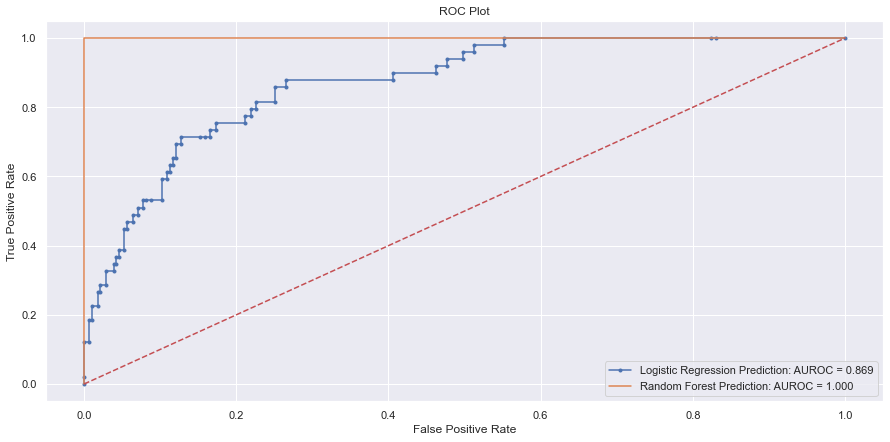

In [36]:
lr_roc_auc_test = roc_auc_score(y_test, test_prediction_lr)
rf_roc_auc_test = roc_auc_score(y_test, test_prediction_rf)

lr_fpr_test, lr_tpr_test, _ = roc_curve(y_test, test_prediction_lr)
plt.figure(figsize=[15,7])
plt.plot(lr_fpr_test, lr_tpr_test, marker='.',  
         label='Logistic Regression Prediction: AUROC = %.3f' % lr_roc_auc_test)
rf_fpr_test, rf_tpr_test, _ = roc_curve(y_test, test_prediction_rf)
# plt.figure(figsize=[15,7])
plt.plot(rf_fpr_test, rf_tpr_test,  
          label='Random Forest Prediction: AUROC = %.3f' % rf_roc_auc_test)

plt.plot([0,1],[0,1],'r--')


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
plt.legend(loc='lower right')
# Show plot
plt.show()

# Additional EDAs

<AxesSubplot:xlabel='Age', ylabel='Count'>

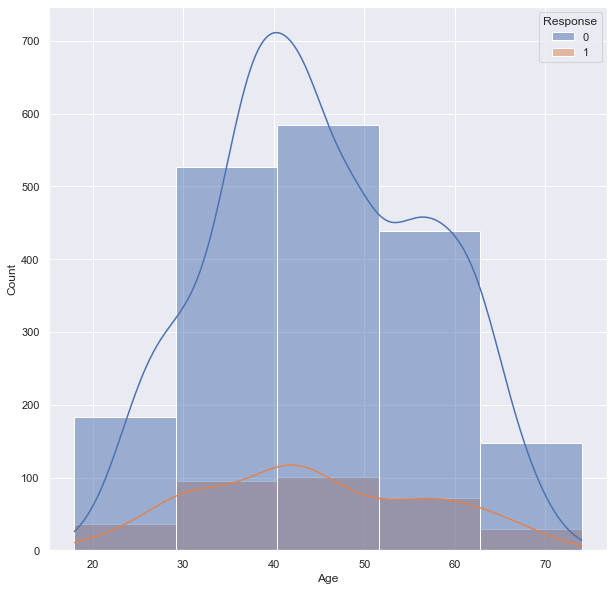

In [37]:
sns.histplot(data=marketing_data, x='Age',bins=5,hue='Response',kde=True,palette='deep')

<AxesSubplot:xlabel='Income', ylabel='Count'>

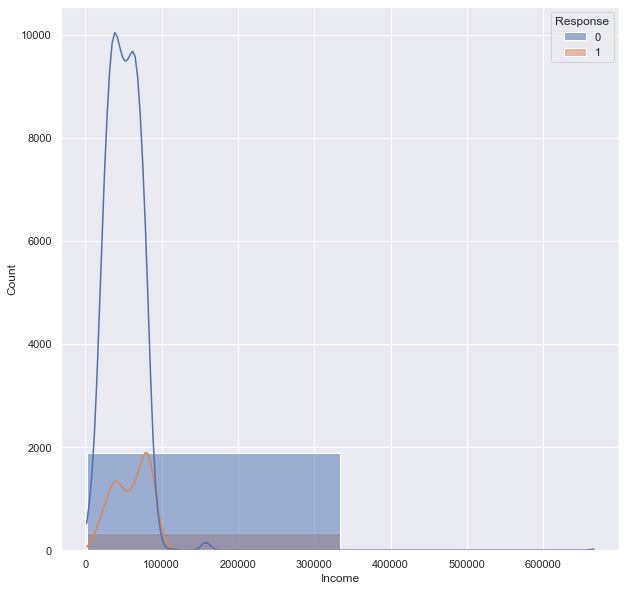

In [38]:
sns.histplot(data=marketing_data, x='Income',bins=2,hue='Response',kde=True,palette='deep')

<AxesSubplot:xlabel='NumWebPurchases', ylabel='Count'>

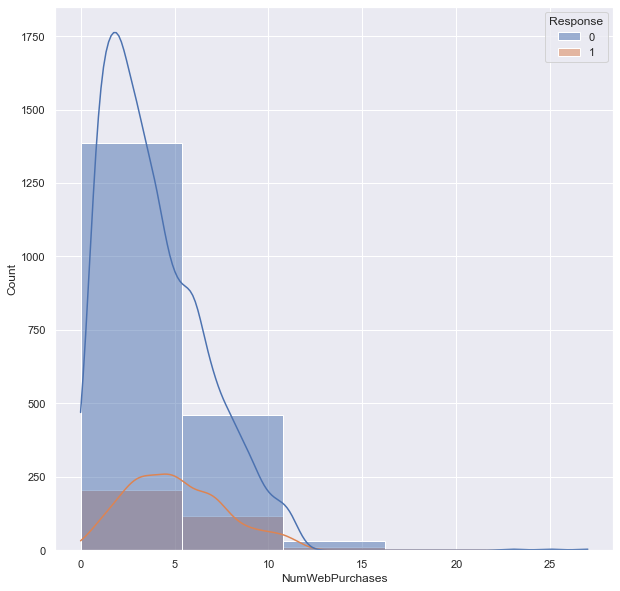

In [39]:
sns.histplot(data=marketing_data, x='NumWebPurchases',bins=5,hue='Response',kde=True,palette='deep')

<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='Count'>

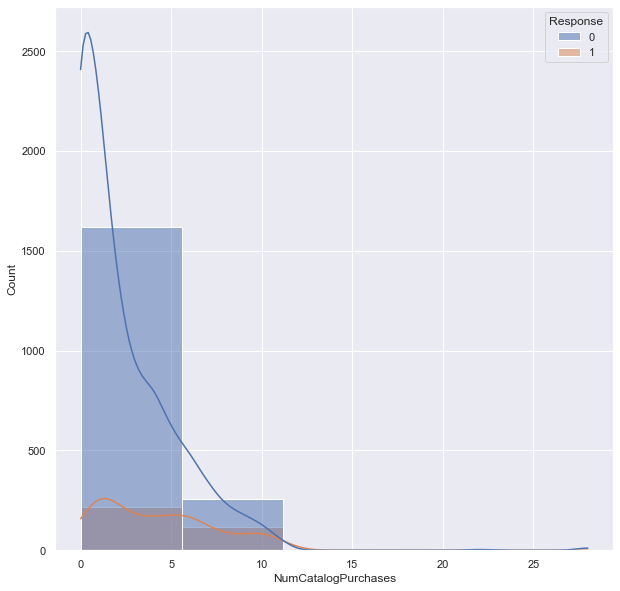

In [41]:
sns.histplot(data=marketing_data, x='NumCatalogPurchases',bins=5,hue='Response',kde=True,palette='deep')

In [42]:
# ax = sns.countplot(x=marketing_data.iloc[:,0],
#                    data=marketing_data,color='rebeccapurple')
# sns.set(rc={'figure.figsize':(10,5)})
# plt.xlabel('Education Level')
# plt.ylabel('Count Of Customers')
# plt.title('EDA for Customer Education Level')

# # label each bar in barplot
# for p in ax.patches:
#  # get the height of each bar
#  height = p.get_height()
#  # adding text to each bar
#  ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
#  y = height+2, # y-coordinate position of data label, padded 100 above bar
#  s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
#  ha = 'center') # sets horizontal alignment (ha) to center

In [43]:
# ax = sns.countplot(x=marketing_data[marketing_data["Response"]==1].iloc[:,0],
#               data=marketing_data,color="teal")
# sns.set(rc={'figure.figsize':(10,10)})
# plt.xlabel('Marital Status')
# plt.ylabel('Quantities Sold')
# plt.title("Education EDA for Last Campaign")

# # label each bar in barplot
# for p in ax.patches:
#  # get the height of each bar
#  height = p.get_height()
#  # adding text to each bar
#  ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
#  y = height+1, # y-coordinate position of data label, padded 100 above bar
#  s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
#  ha = 'center') # sets horizontal alignment (ha) to center

In [44]:
# ax = sns.countplot(x=marketing_data.iloc[:,1],
#                    data=marketing_data,color='rebeccapurple')
# sns.set(rc={'figure.figsize':(10,5)})
# plt.xlabel('Education Level')
# plt.ylabel('Count Of Customers')
# plt.title('EDA for Customer Education Level')

# # label each bar in barplot
# for p in ax.patches:
#  # get the height of each bar
#  height = p.get_height()
#  # adding text to each bar
#  ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
#  y = height+2, # y-coordinate position of data label, padded 100 above bar
#  s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
#  ha = 'center') # sets horizontal alignment (ha) to center

In [45]:
# ax = sns.countplot(x=marketing_data[marketing_data["Response"]==1].iloc[:,1],
#               data=marketing_data,color="teal")
# sns.set(rc={'figure.figsize':(10,10)})
# plt.xlabel('Marital Status')
# plt.ylabel('Quantities Sold')
# plt.title("Marital EDA for Last Campaign")

# # label each bar in barplot
# for p in ax.patches:
#  # get the height of each bar
#  height = p.get_height()
#  # adding text to each bar
#  ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
#  y = height+1, # y-coordinate position of data label, padded 100 above bar
#  s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
#  ha = 'center') # sets horizontal alignment (ha) to center

In [46]:
# x_variables=md_copy[['Education_Undergrad', 'Education_PhD','Education_Masters','Education_High School'
#                      ,'Marital_Status_Divorced','Marital_Status_Single','Marital_Status_Widow',
#                      'Marital_Status_Married','Marital_Status_Together','Income', 'Recency', 
#                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
#                      'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Country_Spain',
#                      'Country_Canada','Country_USA','Country_Australia','Country_Germany',
#                      'Country_India','Country_South Africa','Country_Mexico',
#                      'Cust_Year', 'Dependents', 'Monthly_Spending', 'Accepted_Past_Campaign', 'Age']]
# y_variable=md_copy[['Response']]

# logit_model=sm.Logit(y_variable,x_variables).fit()

# print(logit_model.summary())

In [47]:
# # Customer Education distribution across 4 campaigns
# #Campaigns = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]
# #for item in Campaigns:
# # Accepted_Campaign = marketing_data[marketing_data["response"]==1].iloc[:,1]
# ax = sns.countplot(x=marketing_data[marketing_data["Response"]==1].iloc[:,1],
#               data=marketing_data,color="rebeccapurple")
# sns.set(rc={'figure.figsize':(10,10)})
# plt.xlabel('Marital Status')
# plt.ylabel('Quantities Sold')
# plt.title("Marital EDA for Last Campaign")

# # label each bar in barplot
# for p in ax.patches:
#  # get the height of each bar
#  height = p.get_height()
#  # adding text to each bar
#  ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
#  y = height+1, # y-coordinate position of data label, padded 100 above bar
#  s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
#  ha = 'center') # sets horizontal alignment (ha) to center

In [48]:
# # How product sell across different countries?
# ax=sns.countplot(x=marketing_data.iloc[:,11],data=marketing_data,color="darkturquoise")
# sns.set(rc={'figure.figsize':(10,10)})
# plt.xlabel('Country')
# plt.ylabel('Count Of Customers')
# plt.title('EDA for Country')

# # label each bar in barplot
# for p in ax.patches:
#  # get the height of each bar
#  height = p.get_height()
#  # adding text to each bar
#  ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
#  y = height+20, # y-coordinate position of data label, padded 100 above bar
#  s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
#  ha = 'center') # sets horizontal alignment (ha) to center

In [49]:
# # How product sell across different countries during campaigns? 
# #Campaigns = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]
# #for item in Campaigns:
#     #Accepted_Campaign = marketing_data[marketing_data[item]==1].iloc[:,26]    
# ax=sns.countplot(x=marketing_data[marketing_data["Response"]==1].iloc[:,11],
#               data=marketing_data,color="darkturquoise")
# sns.set(rc={'figure.figsize':(10,10)})
# plt.xlabel('Country')
# plt.ylabel('Count Of Customers')
# plt.title('Country EDA for Last Campaign')

# # label each bar in barplot
# for p in ax.patches:
#  # get the height of each bar
#  height = p.get_height()
#  # adding text to each bar
#  ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
#  y = height+2, # y-coordinate position of data label, padded 100 above bar
#  s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
#  ha = 'center') # sets horizontal alignment (ha) to center

In [50]:
# sns.catplot(data=marketing_data,x=marketing_data.iloc[:,1],kind="count",
#             height=5,aspect=3,color='darkkhaki')
# sns.set(rc={'figure.figsize':(10,10)})
# plt.xlabel('Marital Status')
# plt.ylabel('Count Of Customers')
# plt.title('EDA for Customer Marital Status')

In [51]:
# sns.catplot(data=marketing_data,x=marketing_data[marketing_data["Response"]==1].iloc[:,1],
#             kind="count",height=5,aspect=3,color='darkkhaki')
# sns.set(rc={'figure.figsize':(10,10)})
# plt.xlabel('Marital Status')
# plt.ylabel('Count Of Customers')
# plt.title('Marital EDA for Last Campaign')

In [52]:
# plt.boxplot(x=marketing_data.iloc[:,16],data=marketing_data)

In [53]:
# x_test = x_variables
# y_test = y_variable

# y_predict = logit_model.predict(x_test)
# prediction_lr = list(map(round, y_predict))

# print('Acutal values', list(y_test.values))
# print('Predictions :', prediction_lr)

In [54]:
# from sklearn.metrics import (confusion_matrix, 
#                            accuracy_score)
  
# cm_lr = confusion_matrix(y_test, prediction_lr) 
# print ("Logistic Regression Confusion Matrix : \n", cm_lr) 
  
# print('Logistic Regression Accuracy = %.3f' % accuracy_score(y_test, prediction_lr))

In [55]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve

# lr_roc_auc = roc_auc_score(y_test,y_predict)


# print('Logistic Regression Prediction: AUROC = %.3f' % (lr_roc_auc))


In [56]:
# lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predict)
# plt.figure(figsize=[15,7])
# plt.plot(lr_fpr, lr_tpr, marker='.',  
#          label='Logistic Regression Prediction: AUROC = %.3f' % lr_roc_auc)

# plt.plot([0,1],[0,1],'r--')


# # Title
# plt.title('ROC Plot')
# # Axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # Show legend
# plt.legend() 
# plt.legend(loc='lower right')
# # Show plot
# plt.show()

In [57]:
# # x_variables=md_copy[['Education_Undergrad', 'Education_PhD','Education_Masters','Education_High School'
# #                      ,'Marital_Status_Divorced','Marital_Status_Single','Marital_Status_Widow',
# #                      'Marital_Status_Married','Marital_Status_Together','Income', 'Recency', 
# #                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
# #                      'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Country_Spain',
# #                      'Country_Canada','Country_USA','Country_Australia','Country_Germany',
# #                      'Country_India','Country_South Africa','Country_Mexico',
# #                      'Cust_Year', 'Dependents', 'Monthly_Spending', 'Accepted_Past_Campaign', 'Age']]
# # y_variable=md_copy[['Response']]

# # logit_model=sm.Logit(y_variable,x_variables).fit()

# # x_test = x_variables
# # y_test = y_variable


# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()
# rf.fit(x_test,y_test)
# prediction_rf = rf.predict(x_test)

# cm_rf = confusion_matrix(y_test, prediction_rf) 
# print ("Random Forest confusion Matrix : \n", cm_rf)

# print('Random Forest accuracy = %.3f' % accuracy_score(y_test, prediction_rf))


In [58]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve

# lr_roc_auc = roc_auc_score(y_test,y_predict)
# rf_roc_auc = roc_auc_score(y_test, prediction_rf)


# # print('Logistic Regression Prediction: AUROC = %.3f' % (lr_roc_auc))
# # print('Random Forest Prediction: AUROC = %.3f' % (rf_roc_auc))


# lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predict)
# plt.figure(figsize=[15,7])
# plt.plot(lr_fpr, lr_tpr, marker='.',  
#          label='Logistic Regression Prediction: AUROC = %.3f' % lr_roc_auc)
# rf_fpr, rf_tpr, _ = roc_curve(y_test, prediction_rf)
# # plt.figure(figsize=[15,7])
# plt.plot(rf_fpr, rf_tpr,  
#           label='Random Forest Prediction: AUROC = %.3f' % rf_roc_auc)

# plt.plot([0,1],[0,1],'r--')


# # Title
# plt.title('ROC Plot')
# # Axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # Show legend
# plt.legend() 
# plt.legend(loc='lower right')
# # Show plot
# plt.show()